<a href="https://colab.research.google.com/github/ElisaVianey13/DSC/blob/main/TUGAS_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

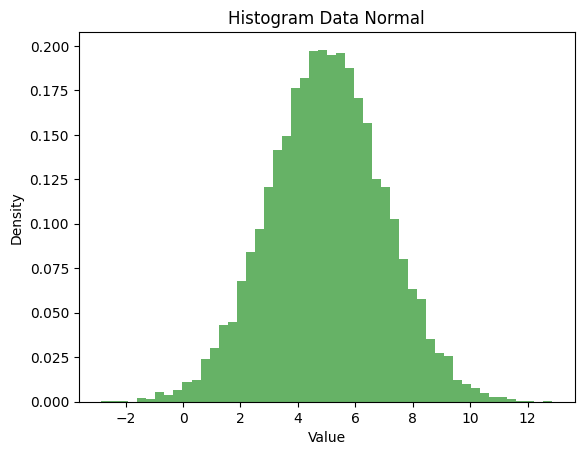

In [ ]:
#####Generate Data Normal####

import numpy as np
import matplotlib.pyplot as plt

# Set parameter distribusi normal
mu_true = 5
sigma_true = 2

# Generate 10.000 data normal
np.random.seed(42)
data = np.random.normal(mu_true, sigma_true, 10000)

# Visualisasi histogram data
plt.hist(data, bins=50, density=True, alpha=0.6, color='g')
plt.title("Histogram Data Normal")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()


Output()

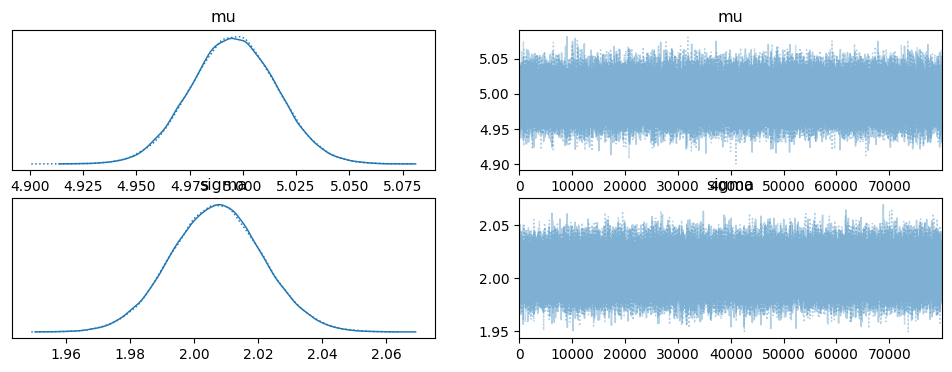

In [ ]:
####Estimasi Parameter dengan Slice Sampling####

import pymc as pm

with pm.Model() as model:
    mu = pm.Normal("mu", mu=0, sigma=10)
    sigma = pm.HalfNormal("sigma", sigma=10)
    likelihood = pm.Normal("obs", mu=mu, sigma=sigma, observed=data)

    # Sampling menggunakan Slice Sampling
    trace_slice = pm.sample(80000, step=pm.Slice(), return_inferencedata=True)

# Plot Trace Plot
pm.plot_trace(trace_slice)
plt.show()


Output()

/usr/local/lib/python3.11/dist-packages/pymc/step_methods/metropolis.py:320: RuntimeWarning: overflow encountered 
in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),

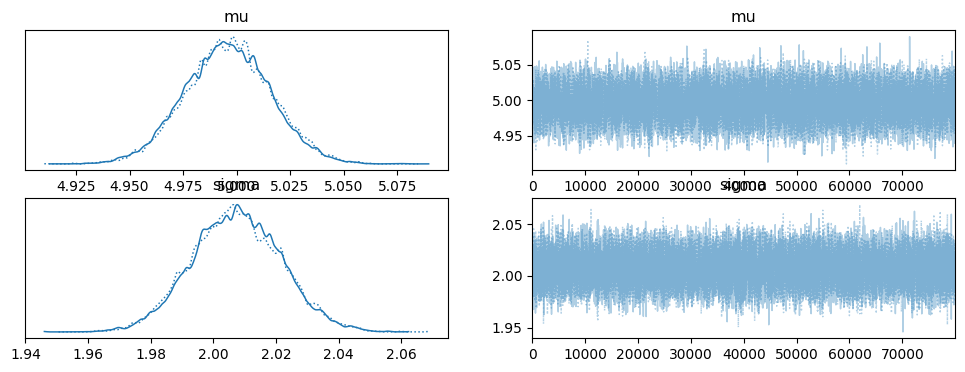

In [ ]:
###Estimasi dengan Metropolis-Hastings (MH)###

with pm.Model() as model_mh:
    mu = pm.Normal("mu", mu=0, sigma=10)
    sigma = pm.HalfNormal("sigma", sigma=10)
    likelihood = pm.Normal("obs", mu=mu, sigma=sigma, observed=data)

    # Sampling menggunakan Metropolis-Hastings
    step = pm.Metropolis()
    trace_mh = pm.sample(80000, step=step, return_inferencedata=True)

# Plot Trace Plot
pm.plot_trace(trace_mh)
plt.show()


In [ ]:
####Evaluasi Konvergensi (Sesuai Jurnal Susanto)###

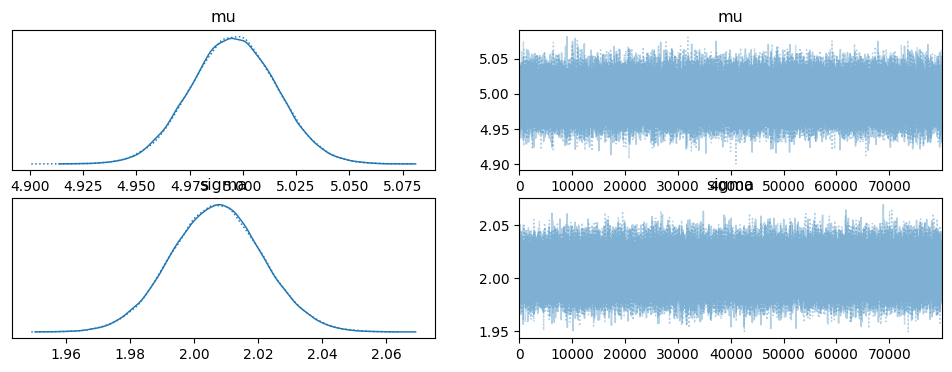

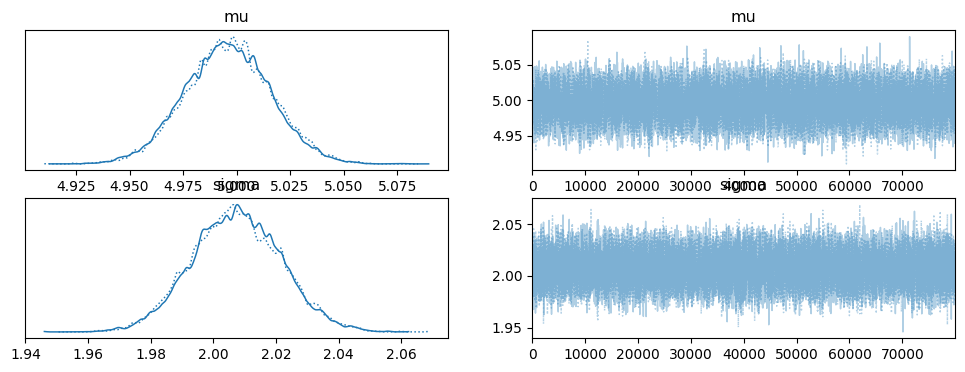

In [ ]:
###a. Trace Plot

pm.plot_trace(trace_slice)
pm.plot_trace(trace_mh)
plt.show()


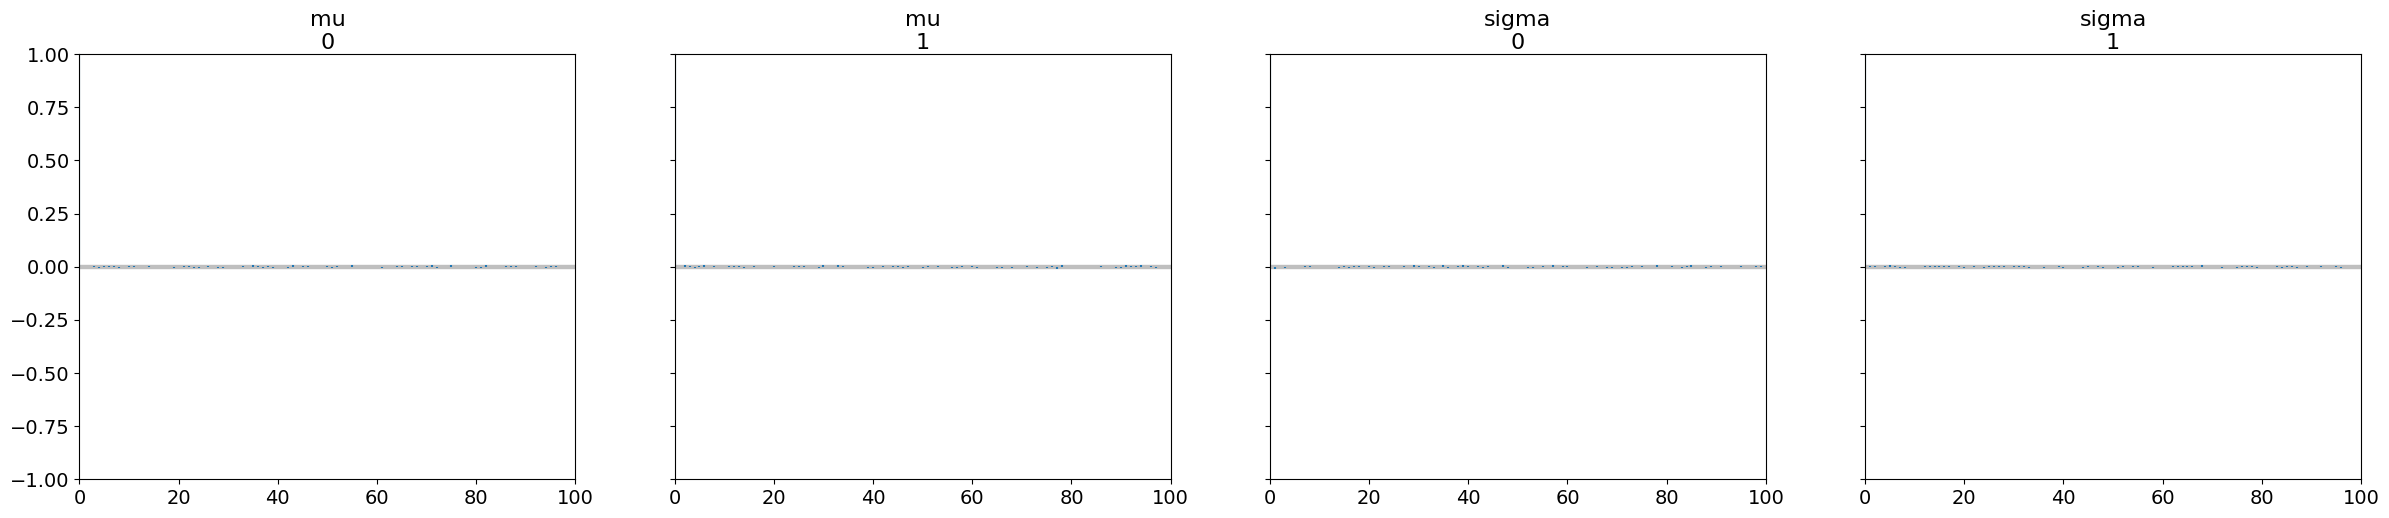

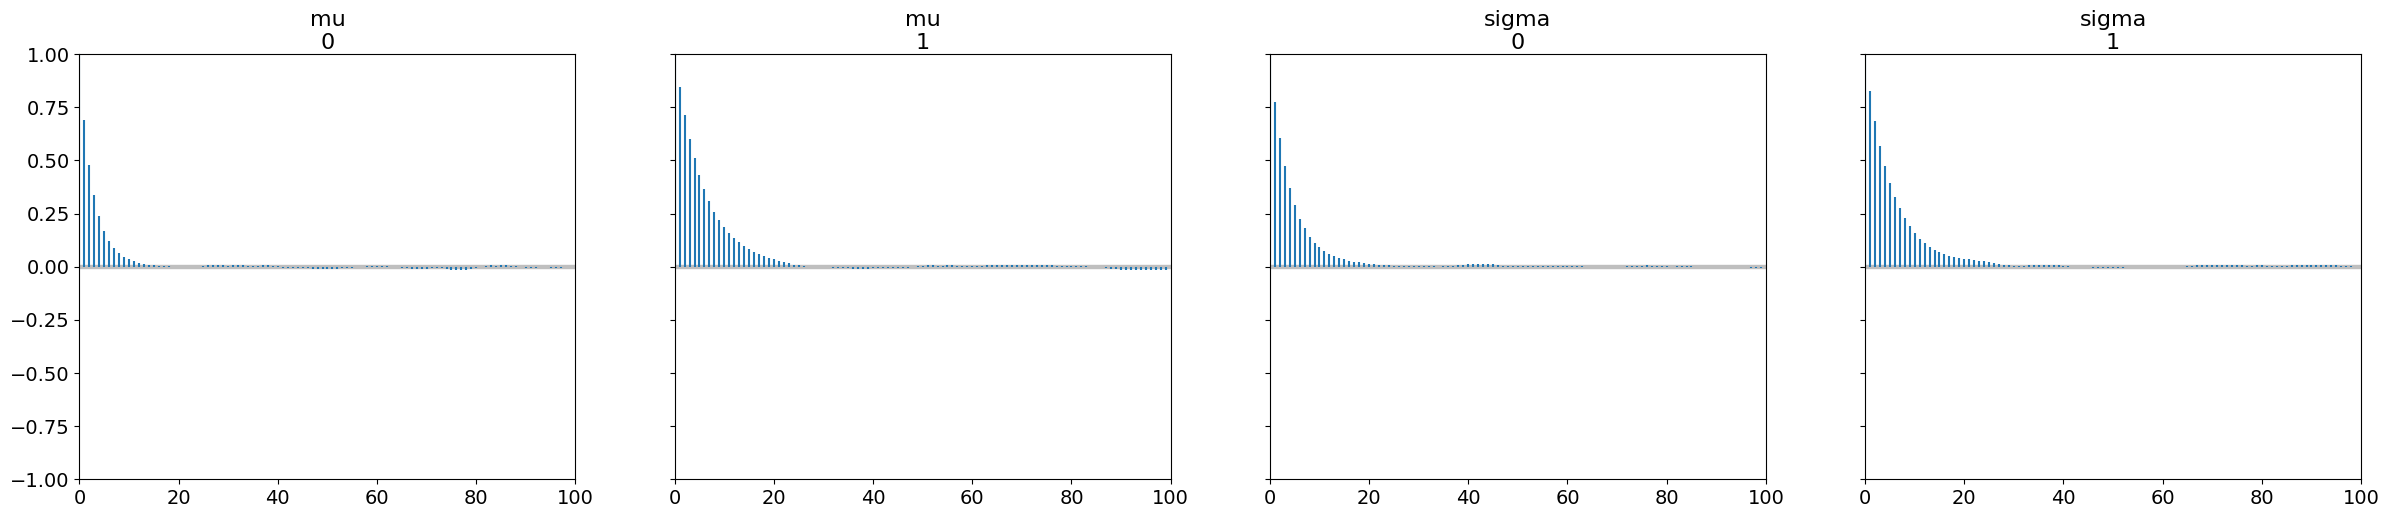

In [ ]:
###b. Autokorelasi

import arviz as az

az.plot_autocorr(trace_slice, var_names=["mu", "sigma"])
az.plot_autocorr(trace_mh, var_names=["mu", "sigma"])
plt.show()


In [ ]:
###Gelman-Rubin Diagnostic (R-hat)

print("R-hat Slice Sampling:")
print(az.rhat(trace_slice))

print("\nR-hat Metropolis-Hastings:")
print(az.rhat(trace_mh))


R-hat Slice Sampling:
<xarray.Dataset> Size: 16B
Dimensions:  ()
Data variables:
    mu       float64 8B 1.0
    sigma    float64 8B 1.0

R-hat Metropolis-Hastings:
<xarray.Dataset> Size: 16B
Dimensions:  ()
Data variables:
    mu       float64 8B 1.0
    sigma    float64 8B 1.0


In [ ]:
####d. Effective Sample Size (ESS)###
print("ESS Slice Sampling:")
print(az.ess(trace_slice))

print("\nESS Metropolis-Hastings:")
print(az.ess(trace_mh))


ESS Slice Sampling:
<xarray.Dataset> Size: 16B
Dimensions:  ()
Data variables:
    mu       float64 8B 1.584e+05
    sigma    float64 8B 1.607e+05

ESS Metropolis-Hastings:
<xarray.Dataset> Size: 16B
Dimensions:  ()
Data variables:
    mu       float64 8B 1.816e+04
    sigma    float64 8B 1.628e+04
